In [18]:
# =============================================================================
# 1. Load Data
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

# Load the data 
df = pd.read_csv('./../Student_Performance.csv')
df.head()  


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [19]:
# =============================================================================
# 2. Select a unique randomization seed
# =============================================================================

seed = 39
np.random.seed(seed)

# let n be the target sample of observations
n = 9000

# let tn be the target sample of observations
tn = 30

In [20]:
# =============================================================================
# 3. Sample Train Data
# =============================================================================

features = ['Hours Studied', 'Previous Scores', 
            'Extracurricular Activities', 
            'Sample Question Papers Practiced', 
            'Performance Index']
target = 'Performance Index'

# Randomly sample 30 observations for training using the seed.
train_df = df.sample(n, random_state=seed)

# Check that the training sample looks representative
print("Training Sample:")
train_df.head()

Training Sample:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9229,2,96,0,9,6,74
7476,6,95,1,8,4,84
2702,5,79,0,8,5,65
3941,1,91,1,5,0,63
3540,1,50,0,4,6,22


In [21]:
scaler = StandardScaler()

In [22]:
X_train = train_df[features].values
y_train = train_df[target].values
X_train_scaled = scaler.fit_transform(X_train)

X_train_aug = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]


In [23]:
# =============================================================================
# 4. Building the Weight Update (Gradient Descent) Function
# =============================================================================
def gradient_descent(X, y, weights, learning_rate=0.01, iterations=50):
    weight_history = []
    for i in range(iterations):
        # Compute predictions
        predictions = X.dot(weights)
        
        # Compute errors and Mean Squared Error (MSE) loss
        errors = predictions - y
        loss = np.mean(errors ** 2)
        
        # Compute gradients (partial derivatives)
        gradients = (1 / len(y)) * X.T.dot(errors)
        
        # Update weights using gradient descent rule
        weights = weights - learning_rate * gradients
        
        # Save current weights in history and print iteration details
        weight_history.append(weights.copy())
        print(f"Iteration {i+1}: Weights = {weights}, Loss = {loss:.4f}")
    return weights, weight_history

# Initialize weights (one for intercept plus one per feature)
initial_weights = np.zeros(X_train_aug.shape[1])


In [24]:
# =============================================================================
# 5. Displaying Weights per Iteration
# =============================================================================
# Run gradient descent
final_weights, weight_history = gradient_descent(X_train_aug, y_train, 
                                                 initial_weights,
                                                 learning_rate=0.01, 
                                                 iterations=30) # sameple is 30 given n = 30 as per instructions
                                                  # please check the last cell for all iterations n = 10,000

Iteration 1: Weights = [0.55303333 0.07057988 0.17564165 0.00456974 0.00812747 0.19195161], Loss = 3426.9129
Iteration 2: Weights = [1.10053633 0.13978054 0.34778338 0.00903144 0.01606743 0.38011248], Loss = 3351.6410
Iteration 3: Weights = [1.6425643  0.2076291  0.51649465 0.01338743 0.02382385 0.56455772], Loss = 3278.1455
Iteration 4: Weights = [2.17917199 0.27415209 0.6818435  0.01763996 0.03140063 0.74536095], Loss = 3206.3803
Iteration 5: Weights = [2.71041361 0.33937555 0.84389664 0.02179127 0.03880157 0.92259433], Loss = 3136.3004
Iteration 6: Weights = [3.2363428  0.40332501 1.00271947 0.02584353 0.04603043 1.0963286 ], Loss = 3067.8621
Iteration 7: Weights = [3.75701271 0.46602547 1.15837607 0.02979887 0.05309085 1.26663308], Loss = 3001.0232
Iteration 8: Weights = [4.27247592 0.52750146 1.31092926 0.03365938 0.05998643 1.43357573], Loss = 2935.7423
Iteration 9: Weights = [4.78278449 0.58777702 1.46044062 0.03742711 0.06672067 1.59722316], Loss = 2871.9797
Iteration 10: Weigh

In [25]:
print(final_weights)

[14.39543702  1.61417284  3.9945572   0.09832369  0.17638351  4.37761043]


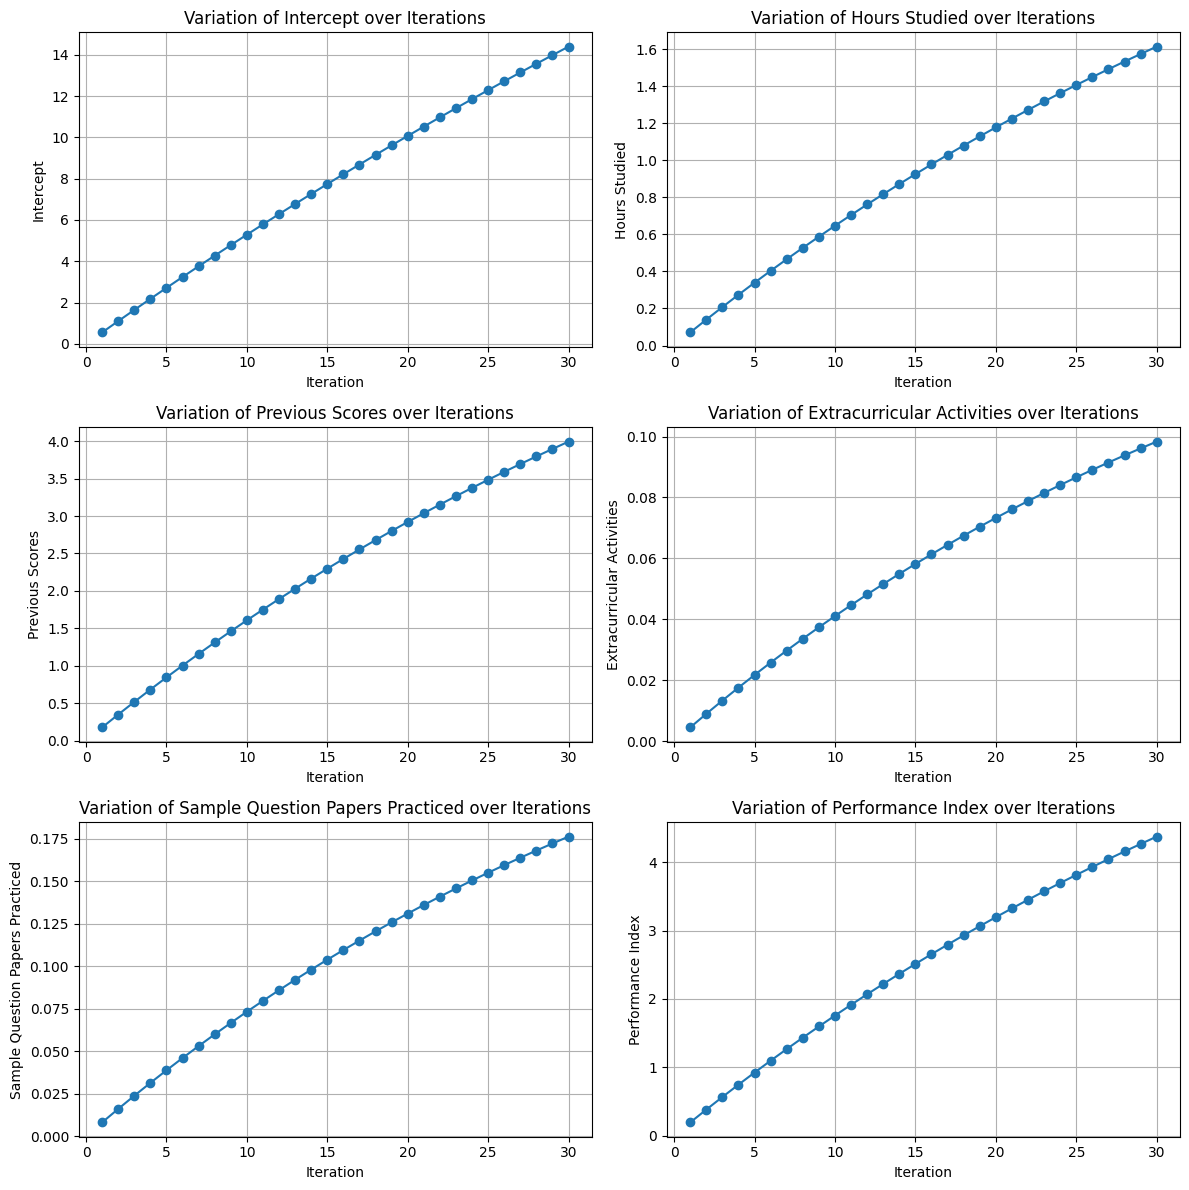

In [26]:
# =============================================================================
# 6. Plot the Value of Weights per Iteration
# =============================================================================

# Convert weight_history list to a NumPy array for plotting
weight_history = np.array(weight_history)  # shape: (iterations, number_of_weights)

# Define names for each weight: first weight is the Intercept, then the feature names
weight_names = ['Intercept'] + features

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()  # Flatten the grid for easy indexing

# Plot the evolution of each weight over iterations
for j in range(weight_history.shape[1]):
    axs[j].plot(range(1, len(weight_history) + 1), weight_history[:, j],
                marker='o', linestyle='-')
    axs[j].set_xlabel('Iteration')
    axs[j].set_ylabel(weight_names[j])
    axs[j].set_title(f'Variation of {weight_names[j]} over Iterations')
    axs[j].grid(True)

# Hide any unused subplots (if any)
for k in range(weight_history.shape[1], len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()


In [27]:
# =============================================================================
# 7. Build a Function for the Final Regression Model
# =============================================================================
# The equation will be in the form: y = intercept + coef1*G1 + coef2*G2
# reminder that final_weights carry the values of each feature vector
equation = f"{final_weights[0]:.4f}"  # Start with the intercept
for idx, feature in enumerate(features, start=1):
    coef = final_weights[idx]
    if coef >= 0:
        equation += f" + {coef:.4f}*{feature}"
    else:
        equation += f" - {abs(coef):.4f}*{feature}"
        
print("Final Regression Model:")
print("y =", equation)


Final Regression Model:
y = 14.3954 + 1.6142*Hours Studied + 3.9946*Previous Scores + 0.0983*Extracurricular Activities + 0.1764*Sample Question Papers Practiced + 4.3776*Performance Index


In [28]:
# =============================================================================
# 8. Sampling Test Data
# =============================================================================

# Remove training observations from the original dataframe
remaining_df = df.drop(train_df.index)

# Randomly sample 30 test observations (use a different seed to avoid overlap)
test_df = remaining_df.sample(tn, random_state=seed+1)


print("Test Sample:")
test_df.head()

Test Sample:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2052,4,95,1,9,4,75
723,6,82,0,4,6,63
6180,7,90,1,7,5,79
6913,3,66,1,7,9,44
173,8,62,0,6,8,53


In [29]:
X_test = test_df[features].values
y_test = test_df[target].values

X_test_scaled = scaler.transform(X_test)
X_test_aug = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

X_test_aug = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [30]:
# =============================================================================
# 9. Use the Regression Function for Prediction
# =============================================================================

# Predict using the final weights for all test observations
predictions = X_test_aug.dot(final_weights)

# Show a few predictions alongside actual values
predictions = X_test_aug.dot(final_weights)
print("Predictions on Test Set:")
predictions


Predictions on Test Set:


array([24.18927586, 19.63633694, 25.88364856, 10.13452439, 14.12637115,
       27.7293717 , 17.17045401, 31.78697138, 28.88831257, 23.45263457,
        4.99349427,  7.34782617, 12.05868862, 19.05888518, 24.03445145,
        2.88573001, 16.8219188 ,  1.2370268 , 12.02438125, 15.07260278,
        4.76998266, 15.83856509,  1.3915144 , 19.42121694, 20.26907245,
        5.55421881,  7.34782617,  0.61334397, 16.5024963 ,  2.05648515])

In [31]:
# =============================================================================
# 10. Calculate for Errors
# =============================================================================

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"Root Mean Squared Error on Test Set: {rmse:.4f}")


Mean Squared Error on Test Set: 1766.5769
Root Mean Squared Error on Test Set: 42.0307


Iteration 1: Weights = [0.55303333 0.07057988 0.17564165 0.00456974 0.00812747 0.19195161], Loss = 3426.9129
Iteration 2: Weights = [1.10053633 0.13978054 0.34778338 0.00903144 0.01606743 0.38011248], Loss = 3351.6410
Iteration 3: Weights = [1.6425643  0.2076291  0.51649465 0.01338743 0.02382385 0.56455772], Loss = 3278.1455
Iteration 4: Weights = [2.17917199 0.27415209 0.6818435  0.01763996 0.03140063 0.74536095], Loss = 3206.3803
Iteration 5: Weights = [2.71041361 0.33937555 0.84389664 0.02179127 0.03880157 0.92259433], Loss = 3136.3004
Iteration 6: Weights = [3.2363428  0.40332501 1.00271947 0.02584353 0.04603043 1.0963286 ], Loss = 3067.8621
Iteration 7: Weights = [3.75701271 0.46602547 1.15837607 0.02979887 0.05309085 1.26663308], Loss = 3001.0232
Iteration 8: Weights = [4.27247592 0.52750146 1.31092926 0.03365938 0.05998643 1.43357573], Loss = 2935.7423
Iteration 9: Weights = [4.78278449 0.58777702 1.46044062 0.03742711 0.06672067 1.59722316], Loss = 2871.9797
Iteration 10: Weigh

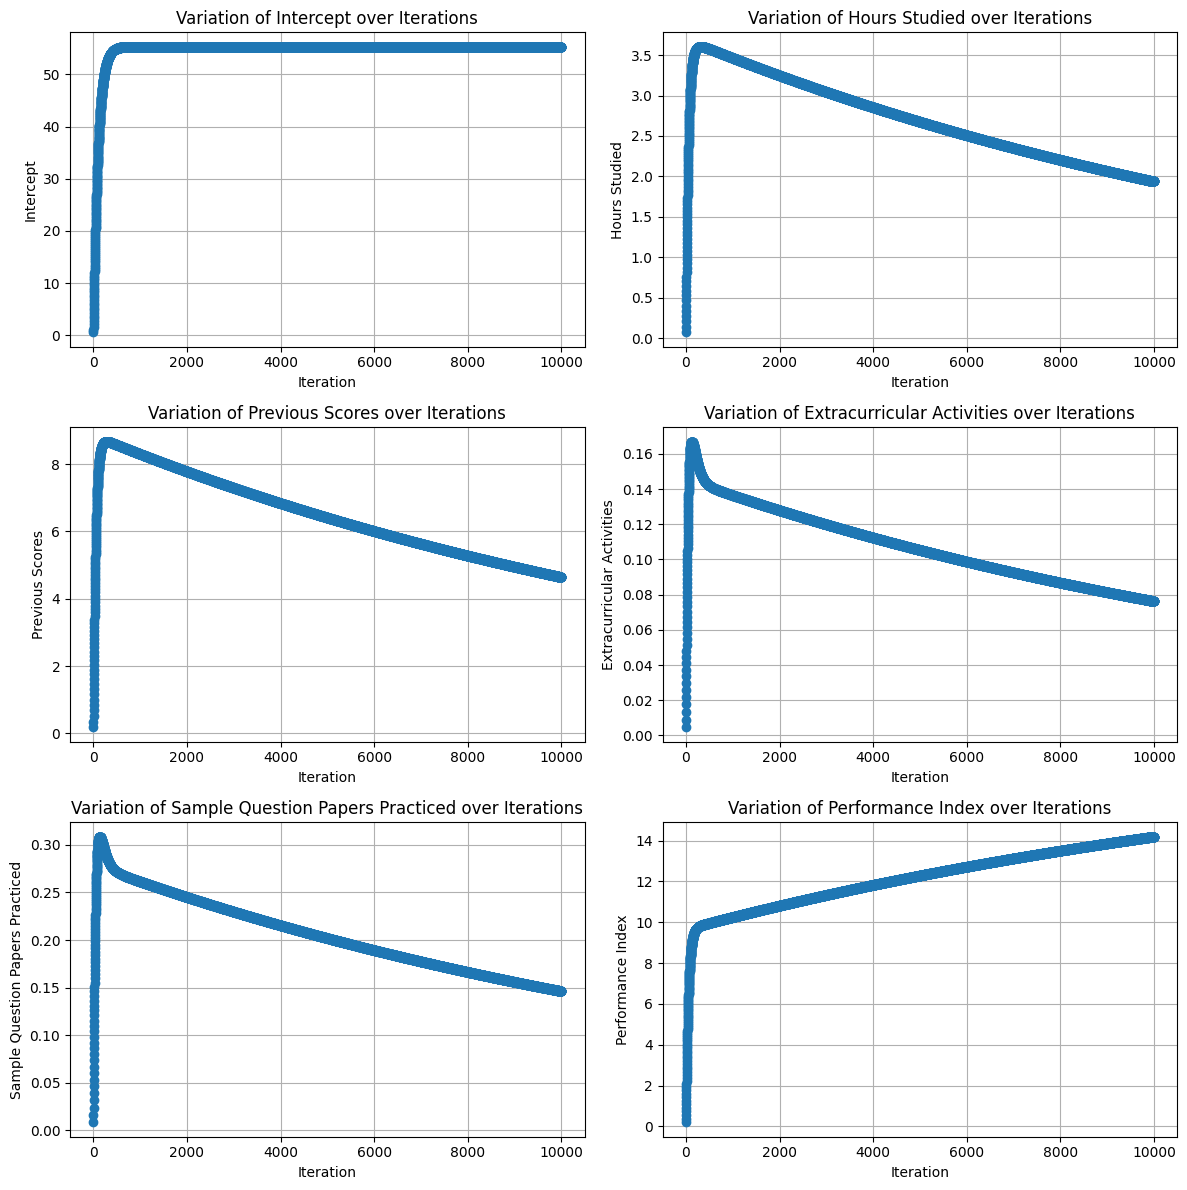

In [32]:
# =============================================================================
# 11. Using all 10,000 iterations ^^
# =============================================================================

final_weights, weight_history = gradient_descent(X_train_aug, y_train, 
                                                 initial_weights,
                                                 learning_rate=0.01, 
                                                 iterations=10000)

# Convert weight_history list to a NumPy array for plotting
weight_history = np.array(weight_history)  # shape: (iterations, number_of_weights)

# Define names for each weight: first weight is the Intercept, then the feature names
weight_names = ['Intercept'] + features

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()  # Flatten the grid for easy indexing

# Plot the evolution of each weight over iterations
for j in range(weight_history.shape[1]):
    axs[j].plot(range(1, len(weight_history) + 1), weight_history[:, j],
                marker='o', linestyle='-')
    axs[j].set_xlabel('Iteration')
    axs[j].set_ylabel(weight_names[j])
    axs[j].set_title(f'Variation of {weight_names[j]} over Iterations')
    axs[j].grid(True)

# Hide any unused subplots (if any)
for k in range(weight_history.shape[1], len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()


In [33]:
# Predict using the final weights for all test observations
predictions = X_test_aug.dot(final_weights)

# Show a few predictions alongside actual values
predictions = X_test_aug.dot(final_weights)
print("Predictions on Test Set:")
predictions

Predictions on Test Set:


array([75.97880846, 65.0768064 , 79.89773847, 44.81125131, 53.93732059,
       85.5155443 , 61.31391823, 94.28898271, 86.79023854, 76.18032813,
       34.75550784, 39.84653892, 48.29053714, 65.79347971, 77.35365527,
       29.8793008 , 61.35045232, 26.54260863, 51.49468495, 57.07502385,
       33.54961898, 58.1716698 , 27.23169159, 67.18271034, 67.71697752,
       34.74397901, 39.84653892, 23.42741847, 59.03189784, 27.37881793])

In [34]:
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"Root Mean Squared Error on Test Set: {rmse:.4f}")

Mean Squared Error on Test Set: 0.8128
Root Mean Squared Error on Test Set: 0.9015
